In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from math import ceil

In [2]:
# Usaremos en este caso la función curve_fit.
from scipy.optimize import curve_fit

# La función que queremos ajustar: exponencial creciente.
def func(x, a, b, c):
    return a * np.exp(a * x + b) + c

In [3]:
def incremento(pais):
    size = len(pais) # tamaño del arreglo
    E = [0] # primer dato 
    [E.append(pais[i+1] - pais[i]) for i in range(size-1)] # cálculo de la E
    E = pd.Series(E, index=pais.index) # Tranformación a Serie con el index igual a las fechas
    return E

In [4]:
plt.style.use('Solarize_Light2')
#plt.style.use('dark_background')
#plt.style.use('classic')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')

In [5]:
fuente = 'fuente: https://github.com/CSSEGISandData/COVID-19.git'

In [6]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(url,error_bad_lines=False)

In [7]:
covid_confirmados = covid.drop(columns= ['Province/State','Lat','Long'])
covid_confirmados = covid_confirmados.groupby(['Country/Region']).sum()
covid_confirmados

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
Albania,0,0,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
Algeria,0,0,0,0,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
Andorra,0,0,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,375,375,375,375,375,375,375,375,376,381
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128


In [9]:
for p in covid_confirmados.index:
    print(p, end='\t')

Afghanistan	Albania	Algeria	Andorra	Angola	Antigua and Barbuda	Argentina	Armenia	Australia	Austria	Azerbaijan	Bahamas	Bahrain	Bangladesh	Barbados	Belarus	Belgium	Belize	Benin	Bhutan	Bolivia	Bosnia and Herzegovina	Botswana	Brazil	Brunei	Bulgaria	Burkina Faso	Burma	Burundi	Cabo Verde	Cambodia	Cameroon	Canada	Central African Republic	Chad	Chile	China	Colombia	Comoros	Congo (Brazzaville)	Congo (Kinshasa)	Costa Rica	Cote d'Ivoire	Croatia	Cuba	Cyprus	Czechia	Denmark	Diamond Princess	Djibouti	Dominica	Dominican Republic	Ecuador	Egypt	El Salvador	Equatorial Guinea	Eritrea	Estonia	Eswatini	Ethiopia	Fiji	Finland	France	Gabon	Gambia	Georgia	Germany	Ghana	Greece	Grenada	Guatemala	Guinea	Guinea-Bissau	Guyana	Haiti	Holy See	Honduras	Hungary	Iceland	India	Indonesia	Iran	Iraq	Ireland	Israel	Italy	Jamaica	Japan	Jordan	Kazakhstan	Kenya	Korea, South	Kosovo	Kuwait	Kyrgyzstan	Laos	Latvia	Lebanon	Lesotho	Liberia	Libya	Liechtenstein	Lithuania	Luxembourg	MS Zaandam	Madagascar	Malawi	Malaysia	Maldives	Mali	Mal

In [10]:
mexico = covid_confirmados.loc['Mexico']
mexico

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
5/13/20    40186
5/14/20    42595
5/15/20    45032
5/16/20    47144
5/17/20    49219
Name: Mexico, Length: 117, dtype: int64

In [11]:
# Adicional el valor de hoy
mexico['5/18/20'] = 51633
mexico

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
5/14/20    42595
5/15/20    45032
5/16/20    47144
5/17/20    49219
5/18/20    51633
Name: Mexico, Length: 118, dtype: int64

In [13]:
covid_maximos = covid_confirmados['5/17/20'].sort_values(ascending=False)
for p in covid_maximos.index:
    print(p, end='\t')

US	Russia	United Kingdom	Brazil	Spain	Italy	France	Germany	Turkey	Iran	India	Peru	China	Canada	Belgium	Saudi Arabia	Mexico	Netherlands	Chile	Pakistan	Ecuador	Qatar	Switzerland	Sweden	Belarus	Portugal	Singapore	Ireland	United Arab Emirates	Bangladesh	Poland	Ukraine	Indonesia	Romania	Israel	Japan	Austria	Colombia	South Africa	Kuwait	Philippines	Dominican Republic	Egypt	Denmark	Korea, South	Serbia	Panama	Czechia	Norway	Argentina	Australia	Algeria	Bahrain	Malaysia	Morocco	Afghanistan	Finland	Kazakhstan	Moldova	Nigeria	Ghana	Oman	Armenia	Bolivia	Luxembourg	Hungary	Iraq	Azerbaijan	Cameroon	Thailand	Greece	Uzbekistan	Guinea	Honduras	Senegal	Bosnia and Herzegovina	Sudan	Croatia	Bulgaria	Cote d'Ivoire	Cuba	Iceland	North Macedonia	Estonia	Guatemala	Lithuania	Tajikistan	New Zealand	Slovakia	Slovenia	Congo (Kinshasa)	Somalia	Djibouti	El Salvador	Gabon	Kyrgyzstan	Maldives	Tunisia	Latvia	Guinea-Bissau	Sri Lanka	Kosovo	Albania	Cyprus	Lebanon	Niger	Kenya	Costa Rica	Mali	Burkina Faso	Paraguay	Andorra	Z

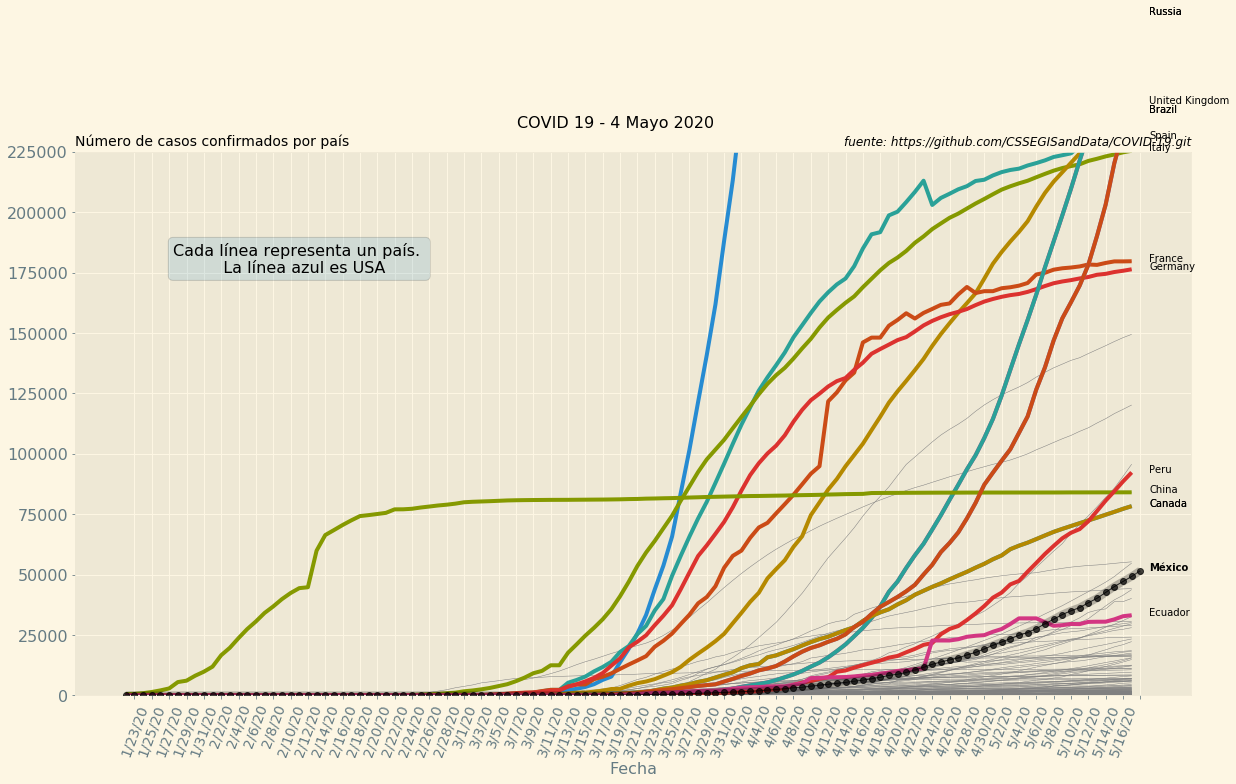

In [14]:
paises = ['US', 'Spain', 'Italy', 'United Kingdom', 'France', 'Germany', 
          'Russia', 'Brazil', 'Canada', 'Russia', 'China', 'Canada', 'Brazil', 
          'Peru', 'Ecuador']

xtext = len(mexico)
thr = -1
par = {'legend':False, 'figsize':(20,10), 'logy':False, 
       'color':'gray', 'lw':0.5, 'ls':'-', 'grid':False,
       'xticks':[i for i in range(1,xtext) if i % 2]}
covid_confirmados.transpose().plot(**par)

col_mex = 'black'
par_mex = {'lw':1.0, 'ls':'-', 'marker':'o', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico[mexico > thr].plot(**par_mex)
par_mex_glow = {'lw':8.0, 'ls':'-', 'marker':'', 'color':col_mex, 'alpha':0.25, 'zorder':100}
mexico[mexico > thr].plot(**par_mex_glow)
plt.text(xtext, mexico[-1], 'México', weight='bold', color=col_mex)

for p in paises:
    par_pais = {'lw':4, 'marker':'', 'label':p}
    covid_confirmados.loc[p].plot(**par_pais)
    if p != 'US':# and p != 'Italy' and p != 'Spain': # and p != 'Brazil' and p != 'China':
        plt.text(xtext, covid_confirmados.loc[p][-1], p)#, color=linea[0].get_color())

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
plt.title('Número de casos confirmados por país', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)
texto='Cada línea representa un país. \n  La línea azul es USA'
plt.text(20, 175000, texto, ha='center', fontsize=16,
        bbox=dict(boxstyle='round', alpha=0.15))#, linewidth=0.75))
plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=16)
plt.ylim(0,225000)
#plt.minorticks_on()
#plt.yscale('linear')
plt.savefig('covid19_confirmados.pdf')

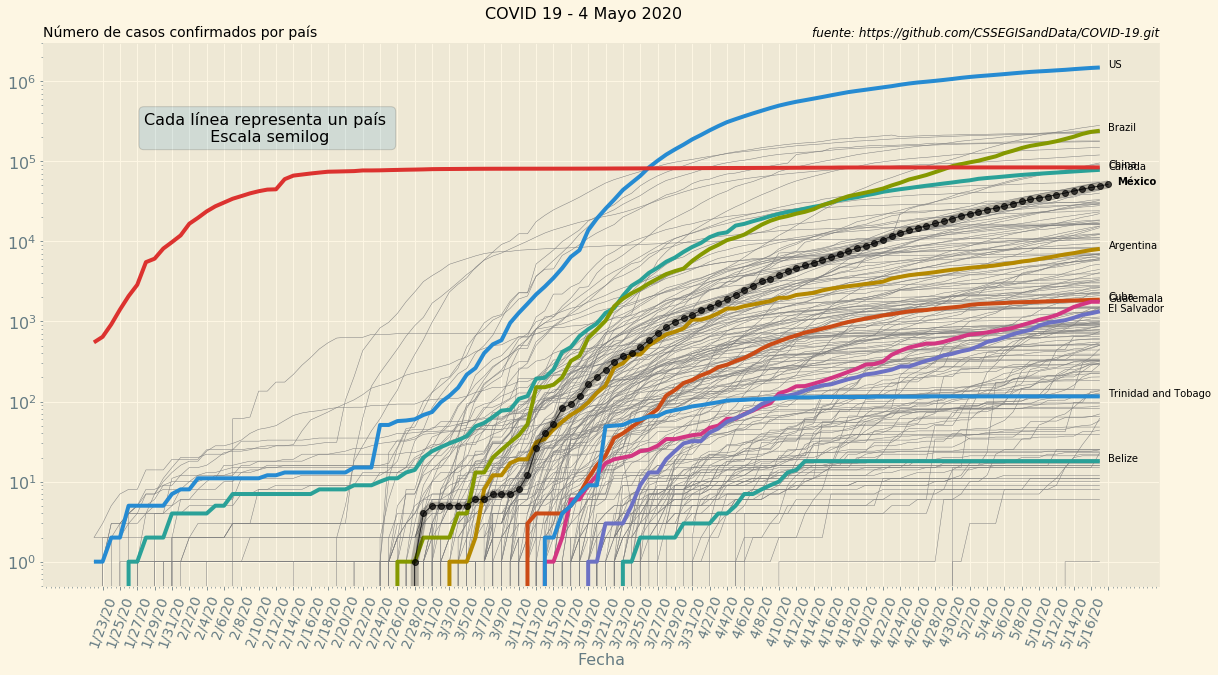

In [15]:
paises = ['US', 'Canada', 'Brazil', 'Argentina', 'Cuba', 'China',
          'Guatemala', 'El Salvador', 'Trinidad and Tobago', 'Belize', ]

xtext = len(mexico[mexico > thr])
par = {'legend':False, 'figsize':(20,10), 'logy':False, 
       'color':'gray', 'lw':0.5, 'ls':'-', 'grid':False,
       'xticks':[i for i in range(1,xtext) if i % 2]}
covid_confirmados.transpose().plot(**par)

thr = -1
#col_mex='#991177'
col_mex='black'
par_mex = {'lw':1.0, 'ls':'-', 'marker':'o', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico[mexico > thr].plot(**par_mex)
par_mex_glow = {'lw':8.0, 'ls':'-', 'marker':'', 'color':col_mex, 'alpha':0.25, 'zorder':100}
mexico[mexico > thr].plot(**par_mex_glow)
plt.text(xtext, mexico[-1], 'México', weight='bold', color=col_mex)

for p in paises:
    pais_x = covid_confirmados.loc[p]
    par_pais = {'lw':4, 'marker':'', 'label':p}
    pais_x[pais_x > thr].plot(**par_pais)
    if True:#p != 'US':# and p != 'Italy' and p != 'Spain': # and p != 'Brazil' and p != 'China':
        xtext = len(pais_x[pais_x > thr])
        plt.text(xtext, covid_confirmados.loc[p][-1], p)#, color=linea[0].get_color())

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
plt.title('Número de casos confirmados por país', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)
texto='Cada línea representa un país \n Escala semilog'
plt.text(20, 175000, texto, ha='center', fontsize=16,
        bbox=dict(boxstyle='round', alpha=0.15))#, linewidth=0.75))
plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=16)
#plt.ylim(1,100000)
plt.yscale('log')
#plt.plot(x,y, 'b.', lw=4.0, alpha=0.5)

plt.minorticks_on()
plt.savefig('covid19_confirmados_semilog.png')

### Ajuste exponencial confirmados

In [16]:
Emex = incremento(mexico)

In [17]:
xd = [x for x in range(len(mexico))]
popt, pcov = curve_fit(func, xd , mexico.values)
perr = np.sqrt(np.diag(pcov))
print(perr, popt)
# Predicción
xc = np.arange(0,170,1)
yc = func(np.array(xc), *popt)

[8.48347784e-04 1.09759309e-01 1.27536274e+02] [ 5.96578106e-02  6.76047314e+00 -7.81350184e+02]


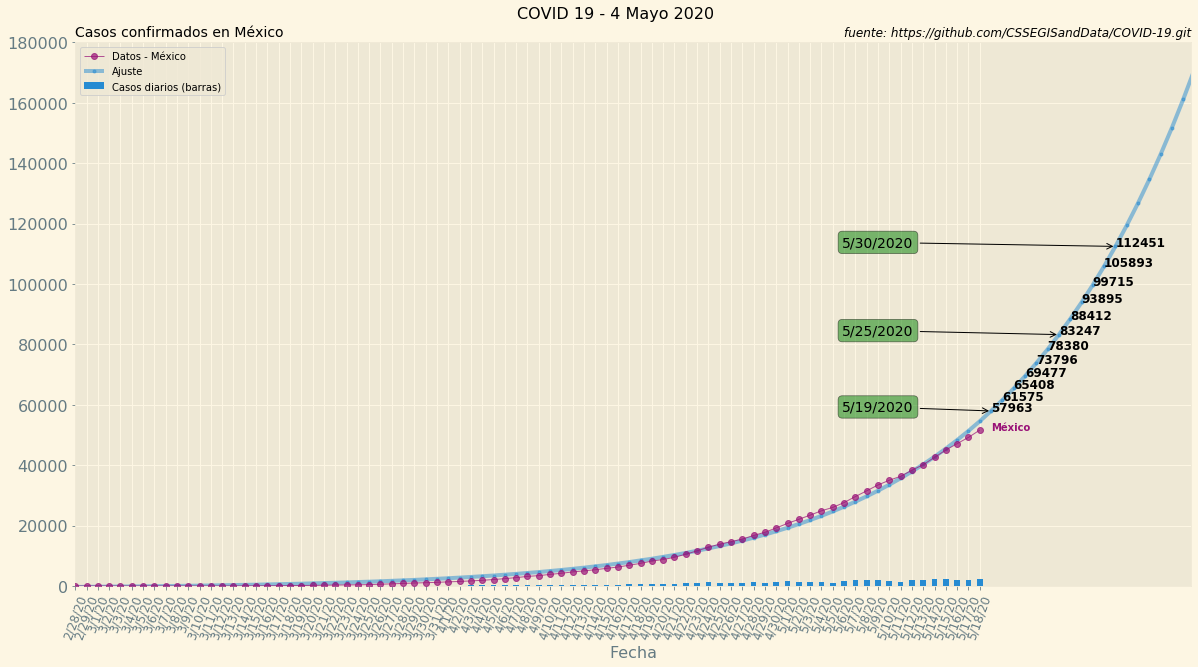

In [21]:
xtext = len(mexico)
col_mex='#991177'
#col_mex='black'
par_mex = {'figsize':(20,10),'lw':1.0, 'ls':'-', 'marker':'o', 'label':'Datos - México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico.plot(**par_mex)
barras = Emex.plot(kind='bar',label='Casos diarios (barras)')
plt.text(xtext, mexico[-1], 'México', weight='bold', color=col_mex)
plt.plot(xc, yc, '.-', lw=4.0, alpha=0.5, label='Ajuste')
plt.xlim(37,xtext * 1.15)
plt.ylim(0,180000)
#plt.xticks(ticks=[xt for xt in range(xtext) if xt % 2])

#plt.yscale('log')
for k in [0,1,2,3,4,5,6,7,8,9,10,11]:
    plt.text(xtext+k, yc[xtext+k], int(yc[xtext+k]), weight='bold', color='black', fontsize=12)

i1 = 0
i2 = 6
i3 = 11
plt.annotate('5/19/2020', xy=(xtext+i1, yc[xtext+i1]), xytext=(xtext-10, yc[xtext+i1]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/25/2020', xy=(xtext+i2, yc[xtext+i2]), xytext=(xtext-10, yc[xtext+i2]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/30/2020', xy=(xtext+i3, yc[xtext+i3]), xytext=(xtext-10, yc[xtext+i3]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
plt.title('Casos confirmados en México', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)

plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=12, rotation=70)
plt.yticks(fontsize=16)

plt.legend()

plt.savefig('covid19_prediccion.png')

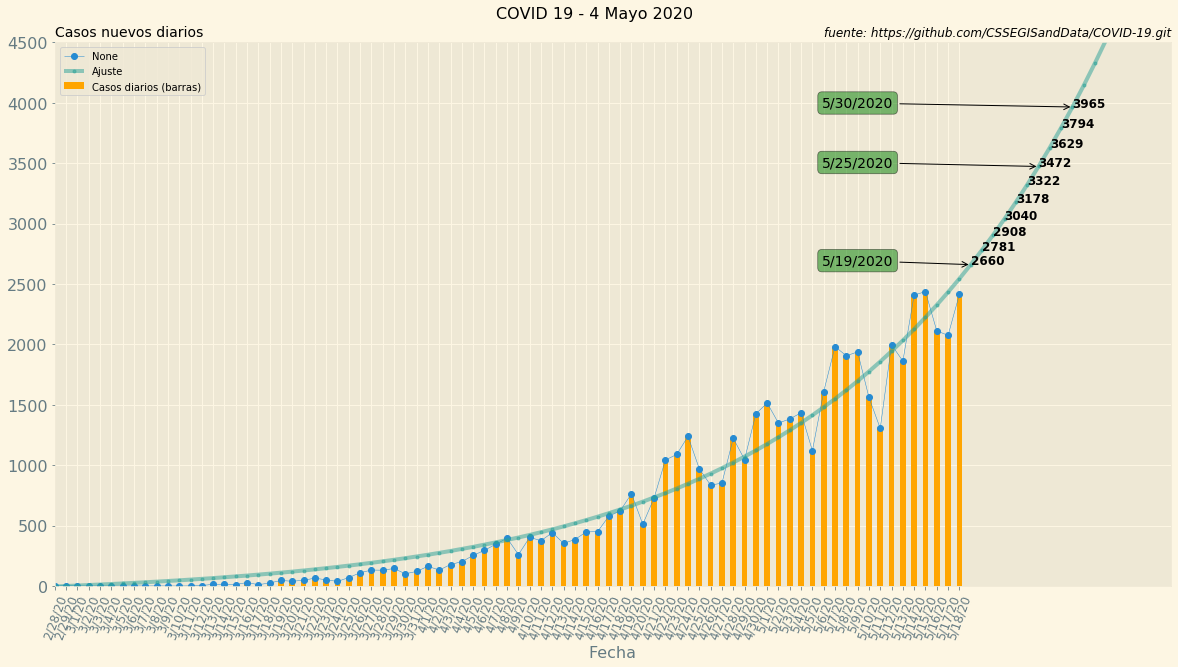

In [23]:
xtext = len(Emex)
#print(xtext)
xe = [x for x in range(len(Emex))]
popt, pcov = curve_fit(func, xe , Emex.values)
perr = np.sqrt(np.diag(pcov))
xep = np.arange(0,170,1)
yep = func(np.array(xep), *popt)
#plt.plot(xd,mexico.values, '.')
plt.figure(figsize=(20,10))

Emex.plot(**{'marker':'o', 'ls':'-', 'lw':0.5})
Emex.plot(kind='bar', **{'color':'orange', 'label':'Casos diarios (barras)'})

plt.plot(xep,yep,'.-', lw=4.0, alpha=0.5, label='Ajuste')
#plt.xticks(ticks=[xt for xt in range(len(Emex)) if xt % 2])
plt.xlim(37,xtext*1.15)
plt.ylim(0,4500)

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
plt.title('Casos nuevos diarios', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)

for k in [0,1,2,3,4,5,6,7,8,9]:
    plt.text(xtext+k, yep[xtext+k], int(yep[xtext+k]), weight='bold', color='black', fontsize=12)

i1 = 0
i2 = 6
i3 = 9
plt.annotate('5/19/2020', xy=(xtext+i1, yep[xtext+i1]), xytext=(xtext-10, yep[xtext+i1]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/25/2020', xy=(xtext+i2, yep[xtext+i2]), xytext=(xtext-10, yep[xtext+i2]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/30/2020', xy=(xtext+i3, yep[xtext+i3]), xytext=(xtext-10, yep[xtext+i3]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=12, rotation=70)
plt.yticks(fontsize=16)
plt.legend()

plt.savefig('covid19_casos_diarios.pdf')

In [24]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dcovid = pd.read_csv(url,error_bad_lines=False)
dcovid.drop(columns= ['Province/State','Lat','Long'], inplace=True)
dcovid = dcovid.groupby(['Country/Region']).sum()
dcovid

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
Albania,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
Andorra,0,0,0,0,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,7,7,8,9,10,12,12,15,18,20


In [25]:
dmexico = dcovid.loc['Mexico']
dmexico

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
5/13/20    4220
5/14/20    4477
5/15/20    4767
5/16/20    5045
5/17/20    5177
Name: Mexico, Length: 117, dtype: int64

In [26]:
# Adicional el valor de hoy
dmexico['5/18/20'] = 5332
dmexico

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
5/14/20    4477
5/15/20    4767
5/16/20    5045
5/17/20    5177
5/18/20    5332
Name: Mexico, Length: 118, dtype: int64

D:\SOFTWARE\Anaconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


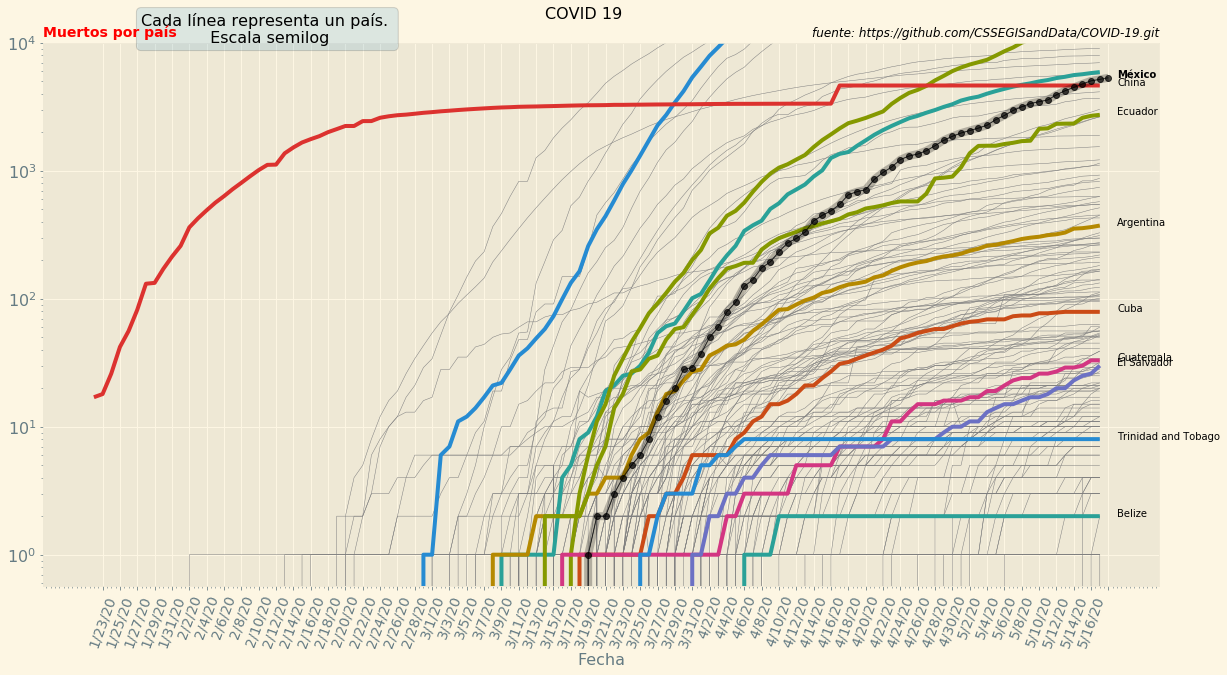

In [28]:
paises = ['US', 'Canada', 'Brazil', 'Argentina', 'Cuba', 'China',
          'Guatemala', 'El Salvador', 'Trinidad and Tobago', 'Belize',
         'Ecuador']

xtext = len(dmexico)
par = {'legend':False, 'figsize':(20,10), 'logy':True, 
       'color':'gray', 'lw':0.5, 'ls':'-', 'grid':False,
       'xticks':[i for i in range(1,xtext) if i % 2]}
dcovid.transpose().plot(**par)

thr = -1

col_mex = 'black'
par_mex = {'lw':1.0, 'ls':'-', 'marker':'o', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = dmexico[dmexico > thr].plot(**par_mex)
par_mex_glow = {'lw':8.0, 'ls':'-', 'marker':'', 'color':col_mex, 'alpha':0.25, 'zorder':100}
dmexico[dmexico > thr].plot(**par_mex_glow)
plt.text(xtext, dmexico[-1], 'México', weight='bold', color=col_mex)

for p in paises:
    par_pais = {'lw':4, 'marker':'', 'label':p}
    dcovid.loc[p].plot(**par_pais)
    if p != 'US' and p != 'Brazil' and p != 'Canada':
        plt.text(xtext, dcovid.loc[p][-1], p)#, color=linea[0].get_color())

plt.suptitle('COVID 19', y = 0.93, fontsize=16)
plt.title('Muertos por país', color='red', weight='bold',loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)

texto='Cada línea representa un país. \n Escala semilog'
plt.text(20, 10000, texto, ha='center', fontsize=16,
        bbox=dict(boxstyle='round', alpha=0.15))#, linewidth=0.75))

plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=16)
plt.ylim(0,10000)
plt.minorticks_on()
plt.yscale('log')
plt.savefig('covid19_muertos_semilog.pdf')

In [29]:
DEmex = incremento(dmexico)

In [30]:
xd = [x for x in range(len(dmexico))]
# Con las listas xdata y ydata ya podemos hacer el ajuste
popt, pcov = curve_fit(func, xd , dmexico.values)
perr = np.sqrt(np.diag(pcov))

print(popt)
xdm = np.arange(0,150,1)
ydm = func(np.array(xdm), *popt)

[ 6.60802373e-02  3.65918867e+00 -7.41618853e+01]


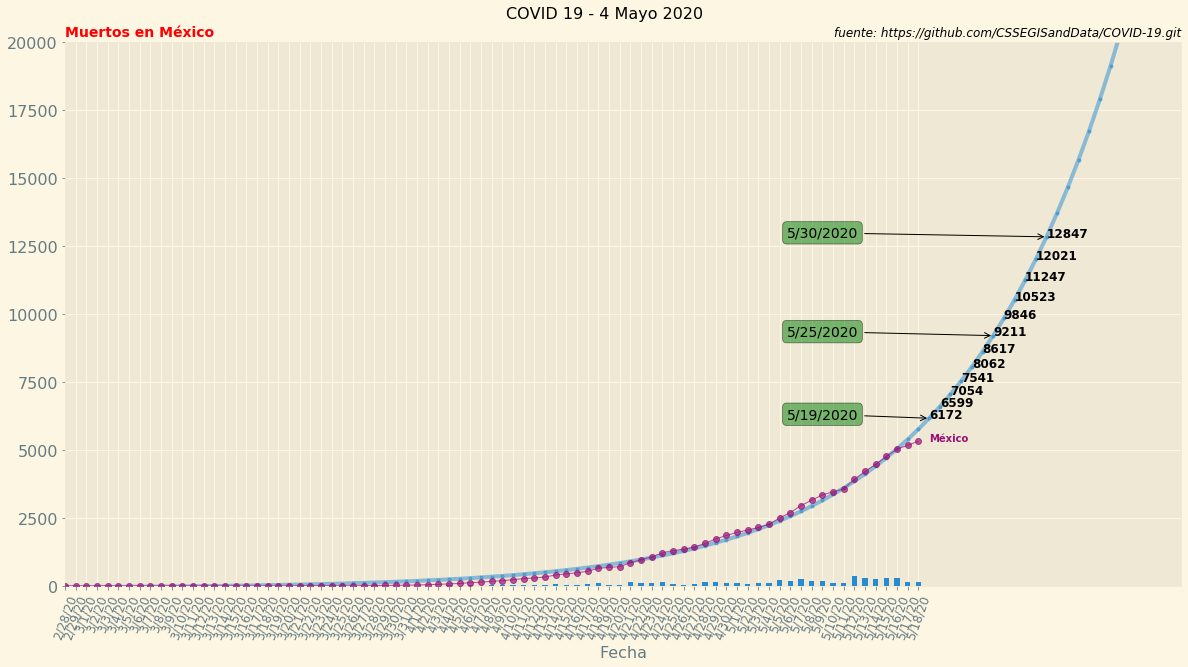

In [32]:
xtext = len(dmexico)
col_mex='#991177'
#col_mex='black'
par_mex = {'figsize':(20,10),'lw':1.0, 'ls':'-', 'marker':'o', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = dmexico.plot(**par_mex)
barras = DEmex.plot(kind='bar')
plt.text(xtext, dmexico[-1], 'México', weight='bold', color=col_mex)
plt.plot(xdm,ydm, '.-', lw=4.0, alpha=0.5)
plt.xlim(37,xtext*1.2)
plt.ylim(0,20000)

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
plt.title('Muertos en México', color='red', weight='bold', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)

#plt.yscale('log')
for k in [0,1,2,3,4,5,6,7,8,9,10,11]:
    plt.text(xtext+k, ydm[xtext+k], int(ydm[xtext+k]), weight='bold', color='black', fontsize=12)

i1 = 0
i2 = 6
i3 = 11
plt.annotate('5/19/2020', xy=(xtext+i1, ydm[xtext+i1]), xytext=(xtext-10, ydm[xtext+i1]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/25/2020', xy=(xtext+i2, ydm[xtext+i2]), xytext=(xtext-10, ydm[xtext+i2]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/30/2020', xy=(xtext+i3, ydm[xtext+i3]), xytext=(xtext-10, ydm[xtext+i3]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=12, rotation=70)
plt.yticks(fontsize=16)
plt.yscale('linear')

plt.savefig('covid19_muertos_mex.png')


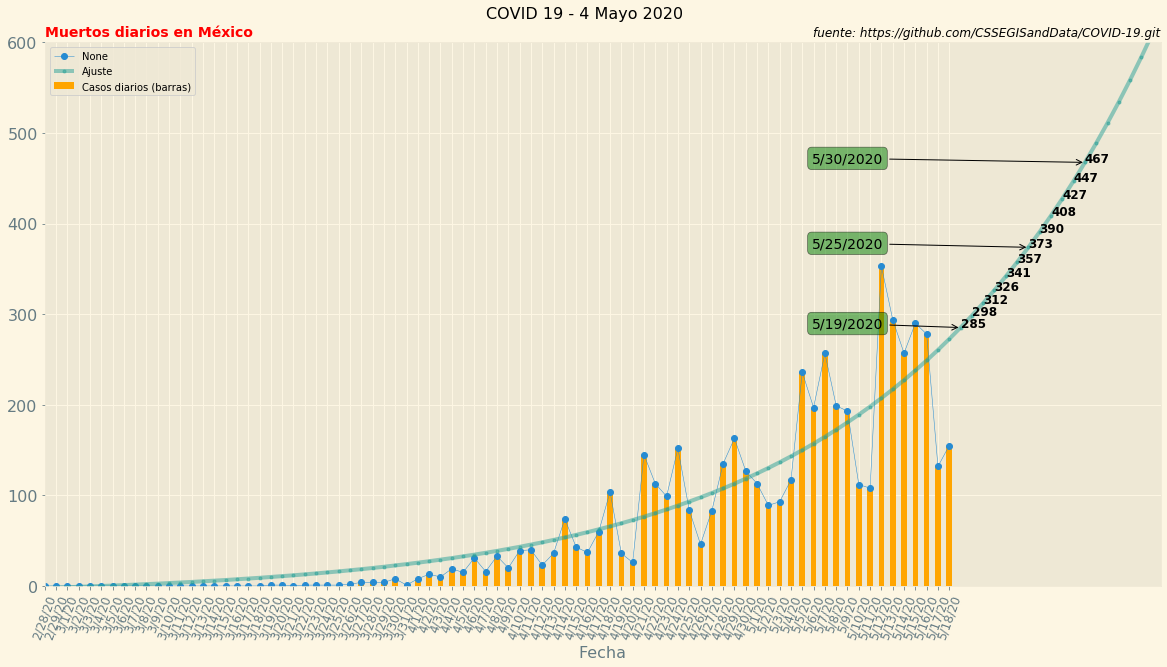

In [33]:
xtext = len(DEmex)

xe = [x for x in range(len(DEmex))]
popt, pcov = curve_fit(func, xe , DEmex.values)
perr = np.sqrt(np.diag(pcov))
xdep = np.arange(0,170,1)
ydep = func(np.array(xdep), *popt)
#plt.plot(xd,mexico.values, '.')
plt.figure(figsize=(20,10))

DEmex.plot(**{'marker':'o', 'ls':'-', 'lw':0.5})
DEmex.plot(kind='bar', **{'color':'orange', 'label':'Casos diarios (barras)'})

plt.plot(xdep,ydep,'.-', lw=4.0, alpha=0.5, label='Ajuste')
#plt.xticks(ticks=[xt for xt in range(len(Emex)) if xt % 2])
plt.xlim(37,xtext*1.15)
plt.ylim(0,600)

plt.suptitle('COVID 19 - 4 Mayo 2020', y = 0.93, fontsize=16)
#plt.title('Casos nuevos diarios', loc='left', fontsize=14)
plt.title('Muertos diarios en México', color='red', weight='bold', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)

for k in [0,1,2,3,4,5,6,7,8,9,10,11]:
    plt.text(xtext+k, ydep[xtext+k], int(ydep[xtext+k]), weight='bold', color='black', fontsize=12)

i1 = 0
i2 = 6
i3 = 11
plt.annotate('5/19/2020', xy=(xtext+i1, ydep[xtext+i1]), xytext=(xtext-10, ydep[xtext+i1]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/25/2020', xy=(xtext+i2, ydep[xtext+i2]), xytext=(xtext-10, ydep[xtext+i2]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.annotate('5/30/2020', xy=(xtext+i3, ydep[xtext+i3]), xytext=(xtext-10, ydep[xtext+i3]),
            bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.5, linewidth=0.75),
            arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
            fontsize=14, color='black', horizontalalignment='center')

plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=12, rotation=70)
plt.yticks(fontsize=16)
plt.legend()

plt.savefig('covid19_casos_diarios.pdf')

81 81
81 81
[1.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 3.0, 2.0, 2.0, 3.0, 7.0, 21.0, 35.0, 47.0, 75.0, 86.0, 111.0, 156.0, 191.0, 225.0, 275.0, 314.0, 323.0, 382.0, 467.0, 553.0, 645.0, 742.0, 778.0, 848.0, 973.0, 1035.0, 1103.0, 1173.0, 1295.0, 1446.0, 1691.0, 1966.0, 2063.0, 2334.0, 2531.0, 2771.0, 2871.0, 2960.0, 3062.0, 3116.0, 3434.0, 3653.0, 4042.0, 4111.0, 4487.0, 5145.0, 5786.0, 6575.0, 6967.0, 7180.0, 7268.0, 7980.0, 8298.0, 8680.0, 9106.0, 9216.0, 9629.0, 10228.0, 10496.0, 10882.0, 11817.0, 12298.0, 12721.0, 12934.0, 12856.0, 13419.0, 14161.0, 14961.0, 15416.0, 15622.0, 15759.0, 16611.0] [    1     4     5     5     5     5     5     6     6     7     7     7
     8    12    26    41    53    82    93   118   164   203   251   316
   367   405   475   585   717   848   993  1094  1215  1378  1510  1688
  1890  2143  2439  2785  3181  3441  3844  4219  4661  5014  5399  5847
  6297  6875  7497  8261  8772  9501 10544 11633 12872 13842 14677 15529
 16752 17799 19224 20739 2

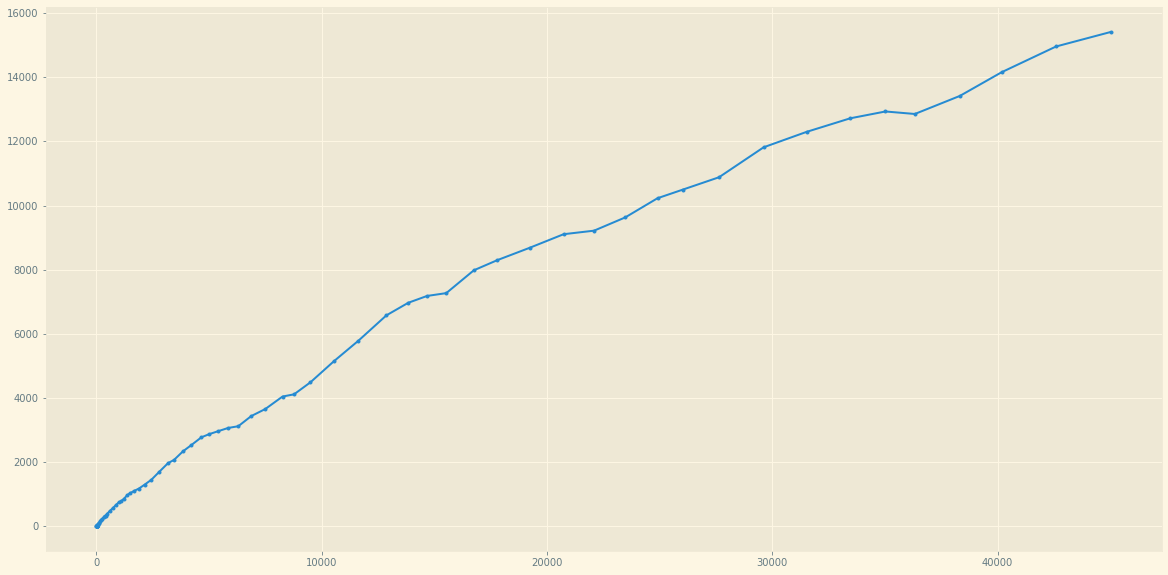

In [34]:
Emex_nonzero = Emex[37:] 
print(len(Emex_nonzero), len(mexico[mexico>0]))

week = 7
prom = []
for i,v in enumerate(Emex_nonzero):
    if i < 7:
        prom.append(sum(Emex_nonzero[0:i+1]) / 1)#(i+1))
#        print(i,v,sum(Emex_nonzero[0:i+1]), prom)
    else:
        prom.append(sum(Emex_nonzero[i-7:i+1]) / 1)
#        print(i, v, prom)
mex_nonzero = mexico[mexico > 0].values
print(len(prom), len(mex_nonzero))
print(prom, mex_nonzero)

plt.figure(figsize=(20,10))
plt.plot(mex_nonzero[:-3], prom[:-3], '.-')
plt.yscale('linear')
plt.xscale('linear')
#plt.xlim(100,30000)

In [ ]:
12 / 7

###### 